# Ford GoBike System Data

This document explores a dataset containing information about a bicyle rental company, Ford GoBike and its system data.

In [1]:
# importing all the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import matplotlib.ticker as tick

%matplotlib inline

In [2]:
# Reading in the 12 datasets which cover the 12 months of the year 2018.
files = ['\dataset\201801-fordgobike-tripdata.csv',
              '\dataset\fordgobike\201802-fordgobike-tripdata.csv',
              '\dataset\fordgobike\201803-fordgobike-tripdata.csv',
              '\dataset\fordgobike\201804-fordgobike-tripdata.csv',
              '\dataset\fordgobike\201805-fordgobike-tripdata.csv',
              '\dataset\fordgobike\201806-fordgobike-tripdata.csv',
              '\dataset\fordgobike\201807-fordgobike-tripdata.csv',
              '\dataset\fordgobike\201808-fordgobike-tripdata.csv',
              '\dataset\fordgobike\201809-fordgobike-tripdata.csv',
              '\dataset\fordgobike\201810-fordgobike-tripdata.csv',
              '\dataset\fordgobike\201811-fordgobike-tripdata.csv',
               '\dataset\fordgobike\201812-fordgobike-tripdata.csv']

In [6]:
# joining all the data files into a single dataframe
bike_data = pd.concat([pd.read_csv(f,) for f in glob.glob("dataset" + "/*.csv")],ignore_index=True)

In [7]:
#Checking and verifying if the data is correctly imported
bike_data.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [8]:
# Using bike_data.shape to get get a high level understanding of the number of entries.
bike_data.shape

(1863721, 16)

In [9]:
# checking if there is any duplicated data entry
sum(bike_data.duplicated())

0

In [10]:
# Finding how many bikes there are in this dataset
bike_data.bike_id.nunique()

5054

### Making a copy of the dataset

In [11]:
df_copy = bike_data.copy()
df_copy

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [13]:
#Removing unwanted columns from the dataset for better analysis
df_copy.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df_copy.head(20)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,Jackson St at 5th St,5th St at Virginia St,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,Market St at Franklin St,4th St at Harrison St,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,Laguna St at Hayes St,Post St at Kearny St,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,Market St at 8th St,West Oakland BART Station,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,17th & Folsom Street Park (17th St at Folsom St),Valencia St at 24th St,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,Berry St at 4th St,4th St at Mission Bay Blvd S,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,Valencia St at 24th St,Cyril Magnin St at Ellis St,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,Ryland Park,San Salvador St at 9th St,1453,Subscriber,1994.0,Female,Yes


## Dataset Structure
    There are 5054 bikes in this dataset with 1,863,721 rows and 12 features (duration, start time, end time, start station id, start station name,end station id, end station name, user type, member birth year, member gender, bike share for all trip.) Most variables are numeric apart from the gender, user type and location names which are objects.

## Main areas of interest in the dataset
    1) Average trip times 
    2) Monthly bike ride trend by average trip times 
    3) Average trip times by gender

## Features in the dataset which will support the investigation.
    The duration_sec column will define the average trip time. Start_time, end_time columns will define monthly bike ride trends. Member_gender will define the gender average trip times.

## Univariate Exploration

## Average bike trips vs seconds

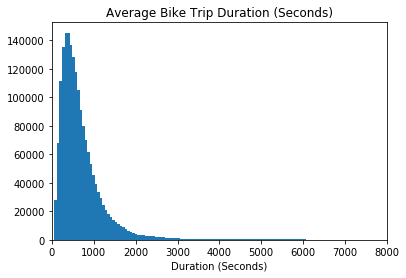

In [14]:
#Plotting of the average trip duration as a main variable.

bin_edges = np.arange(0, df_copy['duration_sec'].max() + 100 , 60)
plt.hist(data = df_copy , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,8000)
plt.title('Average Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)');

    so there are maximum 140000 bike trip held for an average 700 seconds. For much better understanding of graph we will also check the bike trips with respect to minutes.

In [15]:
# Converting the seconds into minutes for better understanding of the graph.
df_copy['duration_min'] = df_copy['duration_sec'] / 60

## Average bike trips vs minutes

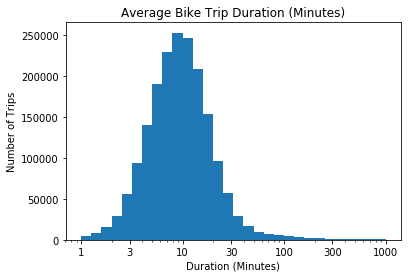

In [16]:
#Log transforming to better understand the data
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_copy , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Bike Trip Duration (Minutes)');
plt.ylabel('Number of Trips');

### Average Bike Trip Duration
    The average bike lasts between 1 and just over 100 minutes with the majority of bike trips lasting just under 10 minutes.

## subscriber vs customer counts

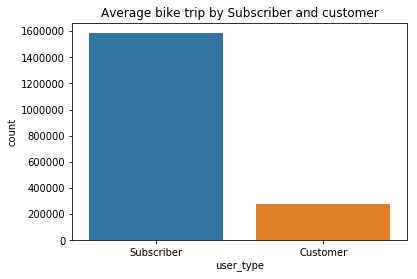

In [17]:
# This slide indicates the data points of subcriber vis-a-vis customer
sb.countplot(data=df_copy,x='user_type')
plt.title('Average bike trip by Subscriber and customer');

    According to this graph it is clearly visible that there are nearly 7 times more Subscriber than Customer.

In [18]:
#Creating a new column with the months from the start_time column
df_copy['month'] = pd.DatetimeIndex(df_copy['start_time']).month
df_copy.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,month
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,1986.0,Male,No,1254.733333,1
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,NaN,NaN,No,1423.700000,1
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,Jackson St at 5th St,5th St at Virginia St,3039,Customer,1996.0,Male,No,1192.933333,1
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,Market St at Franklin St,4th St at Harrison St,321,Customer,NaN,NaN,No,1017.933333,1
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,Laguna St at Hayes St,Post St at Kearny St,617,Subscriber,1991.0,Male,No,666.100000,1


### Monthly bike ride counts

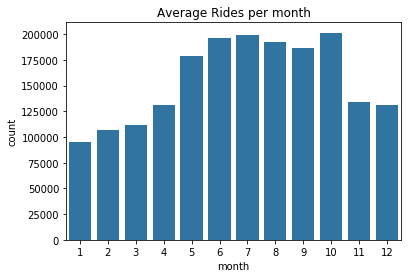

In [19]:
# This slide indicates the data points in a month-wise fashion
sb.countplot(data=df_copy,x='month', color=sb.color_palette()[0])
plt.title('Average Rides per month');

    According to this graph it is concluded that maximum bike rides are taken from may to october.

### Bivariate Exploration
    Now we will investigate the relationship between average bike ride time and months of the year.

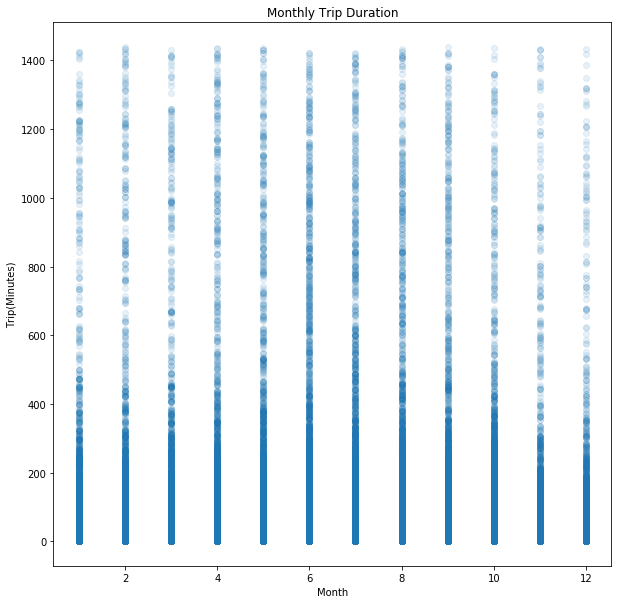

In [20]:
# Now check the bike ride duration for each month
plt.figure(figsize = [10,10])
plt.scatter(data = df_copy , x = 'month' , y = 'duration_min' , alpha = 0.1 )
plt.title('Monthly Trip Duration')
plt.xlabel('Month')
plt.ylabel('Trip(Minutes)');

## Observations of trip duration vs month
    There was a surprisingly consistent minimum of bike trips throughout the year, never dropping under 200 minutes. June and July had the longest trips during those months, and January and December had fewer trips that lasted as long.

### Average trip duration with respect to seasons

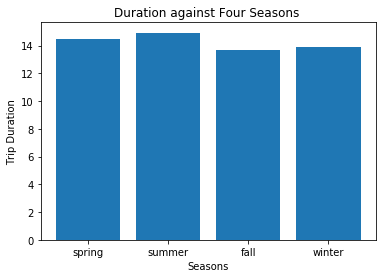

In [21]:
# We categorize our 4 seasons categories
spring = df_copy.query('month in ["3" , "4" , "5"]' ).duration_min.mean ()
summer = df_copy.query('month in ["6" , "7" , "8"]' ).duration_min.mean()
fall = df_copy.query('month in ["9" , "10" , "11"]' ).duration_min.mean()
winter = df_copy.query('month in ["12" , "1" , "2"]' ).duration_min.mean()



plt.bar(['spring','summer','fall','winter'],[spring , summer , fall , winter] )
plt.title('Duration against Four Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

    On an average people take more bike rides in summer season and least in fall season.

### Taking gender counts

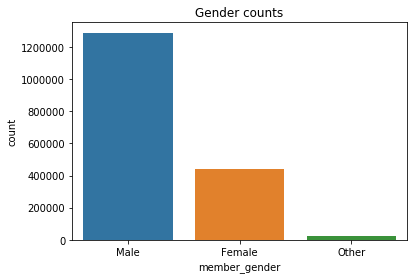

In [22]:
sb.countplot(data = df_copy, x = 'member_gender')
plt.title('Gender counts');

    So basically there are more than 12,00,000 male riders whereas only 400000 are female riders.

### 10 Most common places for starting a trip

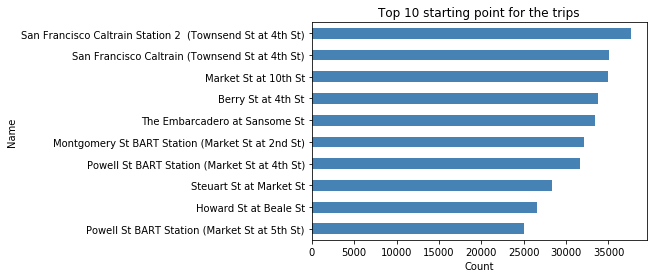

In [27]:
# plt.figure(figsize=(20,100))
# data=df_copy.start_station_name.value_counts()
# sb.barplot(y=data.index, x = data, orient='h',palette='icefire')
# plt.title('Most common starting point for the trip')
# plt.grid()

top_names = df_copy.start_station_name.value_counts()[1:11].sort_values()
top_names.plot(kind = 'barh', color='steelblue')
plt.title('Top 10 starting point for the trips')
plt.xlabel('Count')
plt.ylabel('Name');

     Most of the trips are initiated from san francisco ferry building.

### Multivariate Exploration
    Looking at the relationship between month, trip length and gender.

In [23]:
df_copy['member_age'] = 2019-df_copy['member_birth_year']

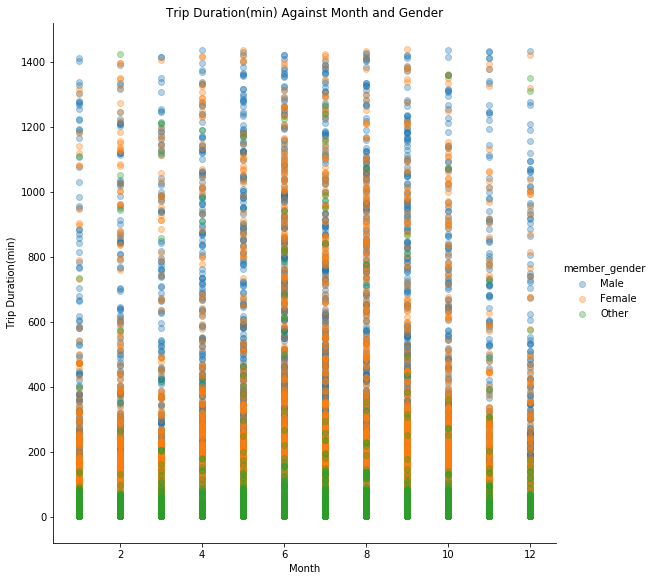

In [24]:
# Finding out how the average trip time is affected by gender and month.
g = sb.FacetGrid(data =  df_copy, hue = 'member_gender', height = 8)
g.map(plt.scatter, 'month','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and Gender')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

## Variable Interactions
    Users who are female have more trips on the whole than male users. What is interesting is that male users have generally longer journey durations, above 400 minutes.

## Interesting factors
    As can be seen male users have longer journey times. There are more female cyclists in the summer months of June, July and August with longer journey times. Male users cycling for longer durations are pretty consistent throughout the year.